In [1]:
# CustomerId : Müşteri İd’si
# Gender : Cinsiyet
# SeniorCitizen : Müşterinin yaşlı olup olmadığı (1, 0)
# Partner : Müşterinin bir ortağı olup olmadığı (Evet, Hayır) ? Evli olup olmama
# Dependents : Müşterinin bakmakla yükümlü olduğu kişiler olup olmadığı (Evet, Hayır) (Çocuk, anne, baba, büyükanne)
# tenure : Müşterinin şirkette kaldığı ay sayısı
# PhoneService : Müşterinin telefon hizmeti olup olmadığı (Evet, Hayır)
# MultipleLines : Müşterinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
# InternetService : Müşterinin internet servis sağlayıcısı (DSL, Fiber optik, Hayır)
# OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# OnlineBackup : Müşterinin online yedeğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# DeviceProtection : Müşterinin cihaz korumasına sahip olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
# TechSupport : Müşterinin teknik destek alıp almadığı (Evet, Hayır, İnternet hizmeti yok)
# StreamingTV : Müşterinin TV yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin, bir üçüncü taraf sağlayıcıdan televizyon programları yayınlamak için İnternet hizmetini kullanıp kullanmadığını gösterir
# StreamingMovies : Müşterinin film akışı olup olmadığı (Evet, Hayır, İnternet hizmeti yok) Müşterinin bir üçüncü taraf sağlayıcıdan film akışı yapmak için İnternet hizmetini kullanıp kullanmadığını gösterir
# Contract : Müşterinin sözleşme süresi (Aydan aya, Bir yıl, İki yıl)
# PaperlessBilling : Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
# PaymentMethod : Müşterinin ödeme yöntemi (Elektronik çek, Posta çeki, Banka havalesi (otomatik), Kredi kartı (otomatik))
# MonthlyCharges : Müşteriden aylık olarak tahsil edilen tutar
# TotalCharges : Müşteriden tahsil edilen toplam tutar
# Churn : Müşterinin kullanıp kullanmadığı (Evet veya Hayır) - Geçen ay veya çeyreklik içerisinde ayrılan müşteriler

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
col = df.columns
col 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for i in col : 
    print(i, ":")
    print(df[i].unique())
    print("--------------")

customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------
gender :
['Female' 'Male']
--------------
SeniorCitizen :
[0 1]
--------------
Partner :
['Yes' 'No']
--------------
Dependents :
['No' 'Yes']
--------------
tenure :
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------
PhoneService :
['No' 'Yes']
--------------
MultipleLines :
['No phone service' 'No' 'Yes']
--------------
InternetService :
['DSL' 'Fiber optic' 'No']
--------------
OnlineSecurity :
['No' 'Yes' 'No internet service']
--------------
OnlineBackup :
['Yes' 'No' 'No internet service']
--------------
DeviceProtection :
['No' 'Yes' 'No internet service']
--------------
TechSupport :
['No' 'Yes' 'No internet service']
--------------
StreamingTV :
['No' 'Yes' 'No internet service']
-

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#df['TotalCharges'] = df["TotalCharges"].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
#df["Churn"].replace(to_replace = "Yes", value = 1, inplace = True)
#df["Churn"].replace(to_replace = "No", value =  0, inplace = True)
###################################################################

#df["Partner"].replace(to_replace = "Yes", value = 1, inplace = True)
#df["Partner"].replace(to_replace = "No", value =  0, inplace = True)
###################################################################

#df["Dependents"].replace(to_replace = "Yes", value = 1, inplace = True)
#df["Dependents"].replace(to_replace = "No", value =  0, inplace = True)
###################################################################

#df["PhoneService"].replace(to_replace = "Yes", value = 1, inplace = True)
#df["PhoneService"].replace(to_replace = "No", value =  0, inplace = True)
###################################################################

#df["PaperlessBilling"].replace(to_replace = "Yes", value = 1, inplace = True)
#df["PaperlessBilling"].replace(to_replace = "No", value =  0, inplace = True)
###################################################################


###################################################################
column = ["Churn", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]
for col in column : 
    df[col].replace(to_replace = "Yes", value = 1, inplace = True)
    df[col].replace(to_replace = "No", value =  0, inplace = True)

df.head()

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_10116\4277078505.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(to_replace = "Yes", value = 1, inplace = True)
C:\Users\MONSTER\AppData\Local\Temp\ipykernel_10116\4277078505.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [12]:
df = df.drop(["customerID"], axis = 1)

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\MONSTER\AppData\Local\Temp\ipykernel_10116\2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.916928,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [17]:
df.corr(numeric_only = True)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102652,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318364,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.063593,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825464,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113013,0.011942
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158055,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650864,0.193356
TotalCharges,0.102652,0.318364,0.063593,0.825464,0.113013,0.158055,0.650864,1.000000,-0.199037
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199037,1.000000


<Axes: >

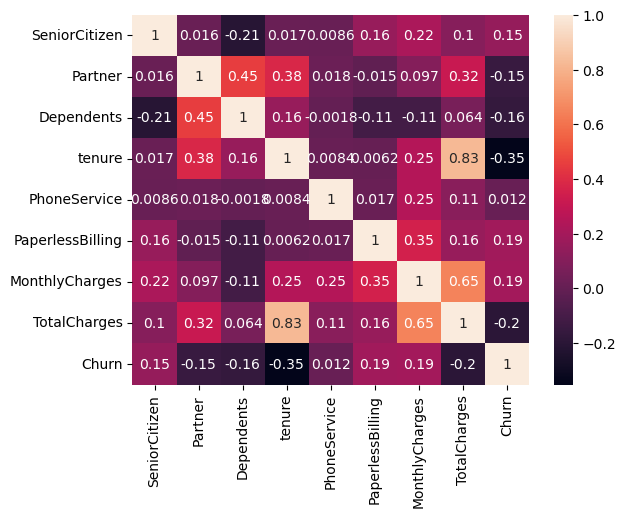

In [18]:
sns.heatmap(df.corr(numeric_only = True), annot= True)

<Axes: >

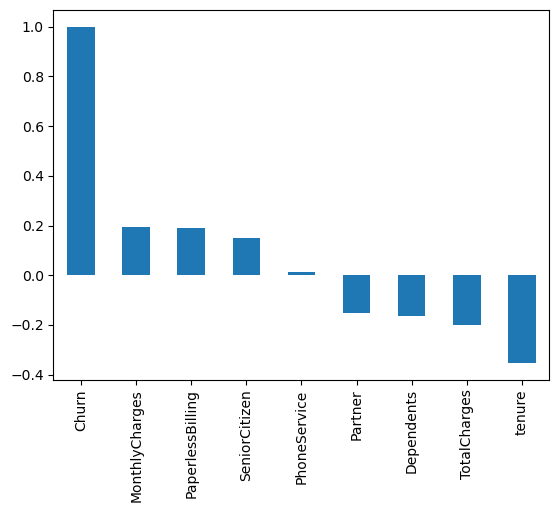

In [19]:
df.corr(numeric_only = True)['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: xlabel='gender', ylabel='count'>

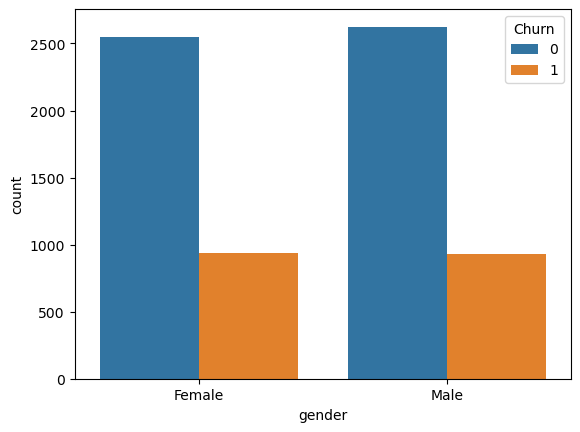

In [20]:
sns.countplot(x='gender', hue='Churn', data=df)

<Axes: xlabel='TotalCharges', ylabel='tenure'>

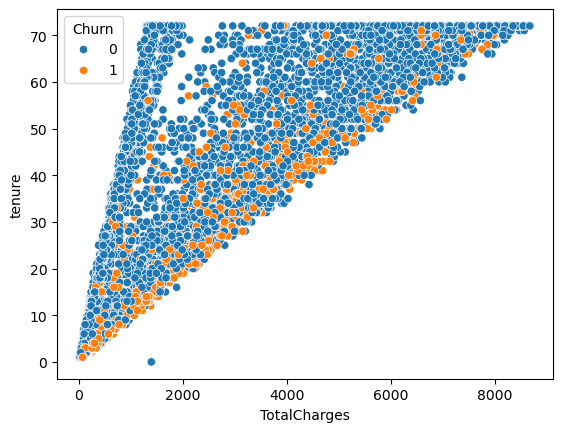

In [21]:
sns.scatterplot(x="TotalCharges", y = "tenure", hue = "Churn", data = df)

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

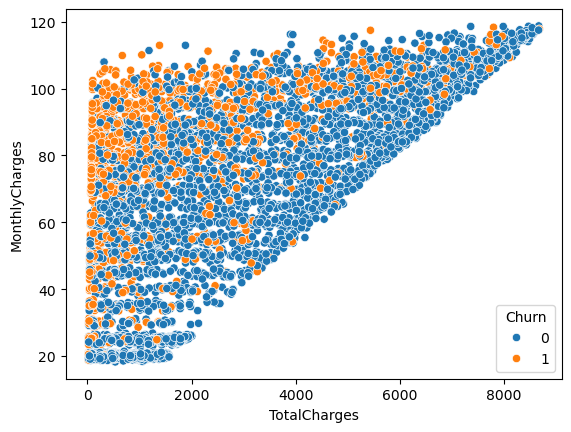

In [22]:
sns.scatterplot(x="TotalCharges", y = "MonthlyCharges", hue = "Churn", data = df)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

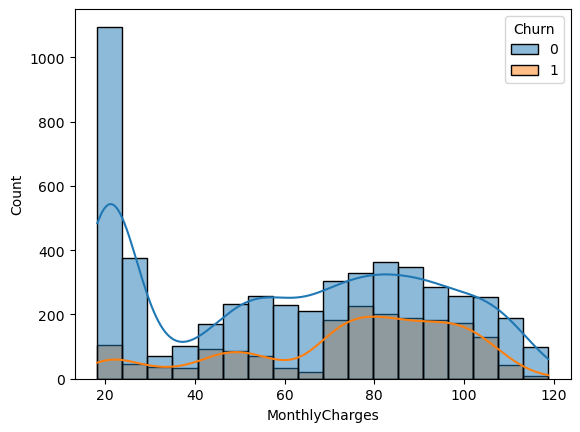

In [23]:
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True)

<Axes: xlabel='Churn', ylabel='tenure'>

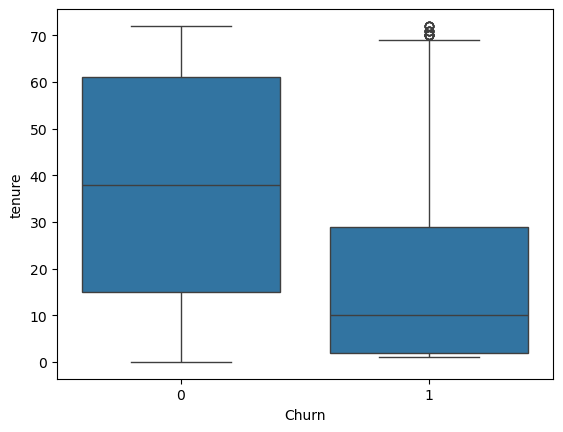

In [24]:
sns.boxplot(x='Churn', y='tenure', data=df)

In [25]:
(df["tenure"]==70).sum()

119

In [26]:
mean_tenure = df['tenure'].mean()

In [27]:
df.loc[df['tenure'] > 70, 'tenure'] = mean_tenure
df.loc[df['tenure'] == 70, 'tenure'] = mean_tenure


C:\Users\MONSTER\AppData\Local\Temp\ipykernel_10116\847438171.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.37114865824223' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['tenure'] > 70, 'tenure'] = mean_tenure


<Axes: xlabel='Churn', ylabel='tenure'>

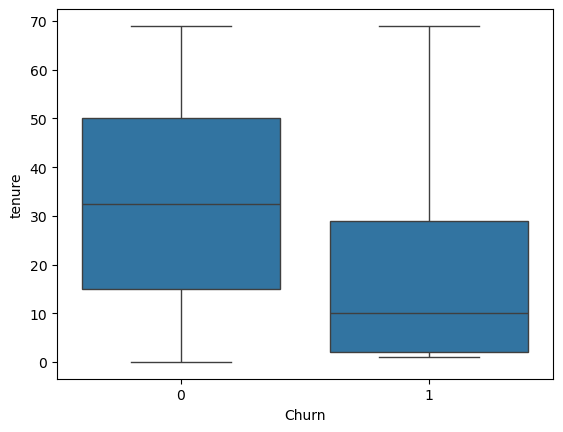

In [28]:
sns.boxplot(x='Churn', y='tenure', data=df)

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [30]:
column = ['gender','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']


df_dummies = pd.get_dummies(df, columns=column, dtype='int')
df_dummies.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1.0,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34.0,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2.0,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45.0,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2.0,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [31]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   float64
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   MonthlyCharges                           7043 non-null   float64
 7   TotalCharges                             7043 non-null   float64
 8   Churn                                    7043 non-null   int64  
 9   gender_Female                            7043 non-null   int32  
 10  gender_Male                              7043 no

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_dummies.drop("Churn", axis = 1)
y = df_dummies["Churn"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [38]:
np.isnan(X_train_scaled).sum()

0

In [39]:
logistic = LogisticRegression()

In [40]:
logistic.fit(X_train_scaled, y_train)

LogisticRegression()

In [41]:
y_pred = logistic.predict(X_test_scaled)

In [42]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
score = accuracy_score(y_pred, y_test)
print("score:", score)

print(classification_report(y_pred, y_test))
print("confusion matrix : /n", confusion_matrix(y_pred, y_test))

score: 0.8211497515968772
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1092
           1       0.59      0.69      0.63       317

    accuracy                           0.82      1409
   macro avg       0.75      0.77      0.76      1409
weighted avg       0.83      0.82      0.83      1409

confusion matrix : /n [[938 154]
 [ 98 219]]


In [44]:
svc = SVC(kernel='linear')

In [45]:
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [46]:
y_pred=svc.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

[[936 100]
 [154 219]]


In [48]:
lgb = LGBMClassifier(verbosity=-1)

In [49]:
lgb.fit(X_train_scaled, y_train)

LGBMClassifier(verbosity=-1)

In [50]:
y_pred = lgb.predict(X_test_scaled)

In [51]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1102
           1       0.53      0.65      0.59       307

    accuracy                           0.80      1409
   macro avg       0.71      0.75      0.73      1409
weighted avg       0.82      0.80      0.81      1409

[[928 174]
 [108 199]]


In [52]:
from sklearn.model_selection import RandomizedSearchCV

lgb_model = LGBMClassifier(verbosity=-1)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(verbosity=-1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, -1],
                                        'min_child_samples': [5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200],
                                        'num_leaves': [15, 31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

In [53]:
random_search.best_params_

{'subsample': 0.6,
 'num_leaves': 63,
 'n_estimators': 200,
 'min_child_samples': 5,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 1.0}

In [54]:
y_pred = random_search.predict(X_test)

In [55]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1113
           1       0.54      0.68      0.60       296

    accuracy                           0.81      1409
   macro avg       0.72      0.76      0.74      1409
weighted avg       0.83      0.81      0.82      1409

[[941 172]
 [ 95 201]]


In [56]:
xgb = XGBClassifier(n_estimators =50 )

In [57]:
xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test)

In [58]:
print("confusion matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: ", accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))

confusion matrix: 
 [[991 356]
 [ 45  17]]
accuracy score:  0.7154009936124911
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1347
           1       0.05      0.27      0.08        62

    accuracy                           0.72      1409
   macro avg       0.50      0.50      0.45      1409
weighted avg       0.92      0.72      0.80      1409



In [59]:
params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

In [60]:
# Randomized search
random_search = RandomizedSearchCV(
    estimator=XGBClassifier(n_estimators=100),
    param_distributions=params,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1, 0.3,
                                                             0.4],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [5, 8, 12, 20, 30],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=1)

In [61]:
random_search.best_params_

{'n_estimators': 200,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 1}

In [62]:
y_pred = random_search.predict(X_test)

In [63]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1153
           1       0.48      0.70      0.57       256

    accuracy                           0.81      1409
   macro avg       0.70      0.76      0.72      1409
weighted avg       0.84      0.81      0.82      1409

[[958 195]
 [ 78 178]]


In [64]:
tree_model = DecisionTreeClassifier(criterion="gini", max_depth=6, random_state=0)

In [65]:
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

In [66]:
y_pred = tree_model.predict(X_test_scaled)

In [67]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7984386089425124
[[909 127]
 [157 216]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1036
           1       0.63      0.58      0.60       373

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [68]:
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [69]:
y_pred = gb.predict(X_test_scaled)
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1116
           1       0.53      0.67      0.59       293

    accuracy                           0.81      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.83      0.81      0.81      1409

[[940 176]
 [ 96 197]]


In [70]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [71]:
y_pred = ada.predict(X_test_scaled)

In [72]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

0.8161816891412349
[[936 100]
 [159 214]]


In [73]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='kd_tree') 
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [74]:
y_pred=classifier.predict(X_test_scaled)

In [75]:
print("confusion matrix: \n ", confusion_matrix(y_pred,y_test))
print("accuracy score: ", accuracy_score(y_pred,y_test))
print("classification report: ", classification_report(y_pred,y_test))

confusion matrix: 
  [[894 180]
 [142 193]]
accuracy score:  0.7714691270404542
classification report:                precision    recall  f1-score   support

           0       0.86      0.83      0.85      1074
           1       0.52      0.58      0.55       335

    accuracy                           0.77      1409
   macro avg       0.69      0.70      0.70      1409
weighted avg       0.78      0.77      0.78      1409



In [76]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)

In [77]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=15)

In [78]:
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.794889992902768


In [79]:
models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(gamma='auto', random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345)),
          ("LightGBM", LGBMClassifier(random_state=12345)),
          ("Decision Tree", DecisionTreeClassifier(random_state=12345)),
          ("Gradient Boosting", GradientBoostingClassifier(random_state=12345)),
          ("Ada Boost", AdaBoostClassifier(random_state=12345)),
          ("Random Forest", RandomForestClassifier(random_state=12345))]




for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f" Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

 Model: LR
Accuracy: 0.8147622427253371
F1 Score (macro): 0.750760597362901
Confusion Matrix:
 [[931 105]
 [156 217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409

--------------------------------------------------


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Model: KNN
Accuracy: 0.7771469127040455
F1 Score (macro): 0.695684531998019
Confusion Matrix:
 [[912 124]
 [190 183]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

--------------------------------------------------
 Model: SVM
Accuracy: 0.7892122072391767
F1 Score (macro): 0.6729864708470314
Confusion Matrix:
 [[976  60]
 [237 136]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1036
           1       0.69      0.36      0.48       373

    accuracy                           0.79      1409
   macro avg       0.75      0.65      0.67      1409
weighted avg       0.78      0.79      0.76      1409

--------

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 Model: Ada Boost
Accuracy: 0.8161816891412349
F1 Score (macro): 0.7507296804569954
Confusion Matrix:
 [[936 100]
 [159 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

--------------------------------------------------
 Model: Random Forest
Accuracy: 0.8005677785663591
F1 Score (macro): 0.7162728769141579
Confusion Matrix:
 [[948  88]
 [193 180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79   